In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import matplotlib.transforms as mtransforms
from random import shuffle
from model_parameters import *

# Heaviside function 
def heav(X):
    if X <= 0:
        return 0
    elif X>0:
        return 1

# SSA function

In [2]:

def run_():
        
    """
    Model parameters
    """
    r_glucose =0.0077
    f_mean_glucose = 0.55
    f_CV_glucose = 0.1 
    cell_size = 0.65
    S0_mean = 0.60 
    S0_CV = 0.1 
    S0_log = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
    SPO_mean = 0.07 
    SPO_CV = 0.03
    SPN_mean = 0.07 
    SPN_CV = 0.03 

    
    """
    Initial state at G1 phase
    """
    cln3=0
    whi5=1
    sbf=0
    cln2=0
    mbf=0
    clb5=0
    ori=0
    mcm1=0
    clb2G=0
    clb2M=0
    cdc20=0
    cdc5=0
    cdc14=0
    swi5=0
    cdh1=1
    sic1=1
    nrm1=0
    sac = 0
    spoc = 0
    spn_progress = 0
    spoc_progress = 0
    time = 0
    del_sac=0
    divide_status = ""
    sac_event = [] # to track SAC checkpoint event
    init_state = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,
                  time,cell_size,S0_log,divide_status,spn_progress,spoc_progress]
    sim_list = [init_state]

    
    tr_ = 500    
    for j in range(tr_):
        
        """
        W function of Boolean variables
        """
        cln3_sum = (cell_size >= S0_log)
        whi5_sum = k60 + k61*cdc14 - k62*cln2 - k63*cln3 
        sbf_sum =  k45 + k47*clb5 + k48*cln2 + k49*cln3 - k46*clb2G - k50*whi5 
        cln2_sum = k30 + k31*mbf + k32*sbf 
        mbf_sum  = k33 + k35*clb5 + k36*cln2 + k37*cln3 - k34*clb2G - k38*nrm1 
        clb5_sum = k25 + k27*mbf + k28*sbf - k29*sic1 - k26*cdc20 
        clb2G_sum = k19 - k20*cdh1 - k21*sic1
        clb2M_sum =  k22 + k24*mcm1 - k23*cdc20
        mcm1_sum = k39 + k41*clb2M + k40*clb2G
        cdc5_sum = k9 + k11*clb2G + k12*clb2M - k10*cdh1 
        cdc20_sum =  k6 + k7*mcm1 - k8*sac 
        cdc14_sum = k1 + k2*cdc5 - k5*spoc - k4*sac - k3*clb2M
        swi5_sum =  k57 + k58*cdc14 + k59*mcm1 
        cdh1_sum = k13 + k14*cdc14 - k16*clb2M - k17*clb5 - k18*cln2 - k15*clb2G
        sic1_sum = k51 + k56*swi5 - k53*clb2M - k54*clb5 - k55*cln2 - k52*clb2G
        nrm1_sum = k42 - k43*cdh1 + k44*mbf
        
        
        """
        Binarizing the W function by Heaviside function
        """
        cln3_new = heav(cln3_sum)
        whi5_new = heav(whi5_sum)
        sbf_new = heav(sbf_sum)
        cln2_new = heav(cln2_sum)
        mbf_new = heav(mbf_sum)
        clb5_new = heav(clb5_sum)
        mcm1_new = heav(mcm1_sum)
        clb2M_new = heav(clb2M_sum)
        cdc20_new = heav(cdc20_sum) 
        cdc5_new = heav(cdc5_sum)
        cdc14_new = heav(cdc14_sum) 
        swi5_new = heav(swi5_sum)
        cdh1_new = heav(cdh1_sum)
        sic1_new = heav(sic1_sum) 
        clb2G_new = heav(clb2G_sum) 
        nrm1_new = heav(nrm1_sum)


        """
        Which protein is changed ?
        """
        cln3_update = cln3_new - cln3
        whi5_update = whi5_new - whi5
        sbf_update =  sbf_new - sbf
        cln2_update = cln2_new - cln2
        mbf_update  = mbf_new - mbf
        clb5_update = clb5_new - clb5
        mcm1_update = mcm1_new - mcm1
        clb2M_update = clb2M_new - clb2M
        cdc20_update = cdc20_new - cdc20
        cdc5_update = cdc5_new - cdc5
        cdc14_update = cdc14_new - cdc14
        swi5_update = swi5_new - swi5
        cdh1_update = cdh1_new - cdh1
        sic1_update = sic1_new - sic1
        clb2G_update = clb2G_new - clb2G
        nrm1_update = nrm1_new - nrm1

        
        """
        Propensity Function
        """
        x1 = abs(cln3_update)
        x2 = x1 + abs(whi5_update)
        x3 = x2 + abs(sbf_update)
        x4 = x3 + abs(cln2_update)
        x5 = x4 + abs(mbf_update)
        x6 = x5 + abs(clb5_update)
        x7 = x6 + abs(mcm1_update)
        x8 = x7 + abs(clb2M_update)
        x9 = x8 + abs(cdc20_update)
        x10 = x9 + abs(cdc5_update)
        x11 = x10 + abs(cdc14_update) 
        x12 = x11 + abs(swi5_update)
        x13 = x12 + abs(cdh1_update)
        x14 = x13 + abs(sic1_update)
        x15 = x14 + abs(clb2G_update)
        x16 = x15 + abs(nrm1_update)


        """
        if no state changes, set propensity to 1
        """

        if x16 == 0:
            x17 = 1
        else:
            x17 = x16


        """
        Selecting a single variable to change with a uniform asynchronous update
        """
        sel = random.uniform(0,1)*x17
        y1 = (sel<=x1)
        y2 = (sel>x1)&(sel<=x2)
        y3 = (sel>x2)&(sel<=x3)
        y4 = (sel>x3)&(sel<=x4)
        y5 = (sel>x4)&(sel<=x5)
        y6 = (sel>x5)&(sel<=x6)
        y7 = (sel>x6)&(sel<=x7)
        y8 = (sel>x7)&(sel<=x8)
        y9 = (sel>x8)&(sel<=x9)
        y10 = (sel>x9)&(sel<=x10)
        y11 = (sel>x10)&(sel<=x11)
        y12 = (sel>x11)&(sel<=x12)
        y13 = (sel>x12)&(sel<=x13)
        y14 = (sel>x13)&(sel<=x14)
        y15 = (sel>x14)&(sel<=x15)
        y16 = (sel>x15)&(sel<=x16)
        y17 = (sel>x16)


        """
        Updating time
        """
        delt = np.random.gamma(3,0.3)
        time = time + delt

        """
        Updating size
        """ 
        if (clb2G == 1 and clb2G_new == 0 and y15 == 1):
            f = np.random.lognormal(np.log(f_mean_glucose),f_CV_glucose, 1)[0]
            S0_log  = np.random.lognormal(np.log(S0_mean),S0_CV,1)[0]
            cell_size = cell_size*math.exp(r_glucose*delt) * f
            divide_status = "divided !!!"

        else:
            cell_size = cell_size*math.exp(r_glucose*delt)
            divide_status = ""


        """
        Updating variables
        """
        cln3 = cln3 + cln3_update*y1
        whi5 = whi5 + whi5_update*y2
        sbf =  sbf + sbf_update*y3
        cln2 = cln2 + cln2_update*y4
        mbf =  mbf + mbf_update*y5
        clb5 = clb5 + clb5_update*y6
        mcm1 = mcm1 + mcm1_update*y7
        clb2M = clb2M + clb2M_update *y8
        cdc20 = cdc20 + cdc20_update*y9
        cdc5 = cdc5 + cdc5_update*y10
        cdc14 = cdc14 + cdc14_update*y11
        swi5 = swi5 + swi5_update*y12
        cdh1 = cdh1 + cdh1_update*y13
        sic1 = sic1 + sic1_update*y14
        clb2G = clb2G + clb2G_update*y15
        nrm1 = nrm1 + nrm1_update*y16
        
        
        """
        Switch cln3/whi5 based on cell size
        """

        if cell_size < S0_log:
            cln3,whi5 = 0,1
        else:
            cln3,whi5 = 1,0
     
           
        """
        ORI begin
        """
        # DNA start
        if (clb5 == 1 or clb2M == 1 or clb2G == 1):
            ori = 1
        else:
            ori = 0

        # Spindle Assemly Checkpoint
        if (ori == 1 and spn_progress < 1):
            sac=1
        else:
            sac=0

        """
        SAC Checkpoint
        """
        # Spindle assembly progress: start when Clb2M is ON
        if(clb2M == 1 and sac == 1):
            
            num =  np.random.lognormal(np.log(SPN_mean),SPN_CV,1)[0]
            spn_progress += num
            
            if spn_progress >= 1:
                spn_progress = 1
         
        
        """
        SPoC checkpoint
        """
    
        # SPoC Checkpoint
        # 10 = the starting time step for monitoring SAC checkpoint (10 is arbritary)
        if j >= 10:
            t_previous = sac_event[j-2]
            t_current = sac_event[j-1]
            del_sac = t_current-t_previous
        
        if (cdc20 == 1 and del_sac == -1 and spoc_progress < 1):
            spoc = 1
        elif spoc_progress >= 1:
            spoc = 0
        
                
        ## SPoC progress
        if(cdc20 == 1 and spoc == 1):
            num = np.random.lognormal(np.log(SPO_mean),SPO_CV,1)[0]
            spoc_progress += num
            if spoc_progress >= 1:
                spoc_progress = 1    
                
           
        """
        Resetting progress variables when the progress is done,e.g., spindle progress reset back to zero when anaphase start (cdc20 = 1) 
        """
    
        if cdc20 == 1:
            spn_progress = 0
            sac = 0 
        
        if cdc14 == 1:
            spoc_progress = 0
            spoc = 0
                
        res_ = [cln3,whi5,sbf,cln2,mbf,clb5,ori,clb2G,cdc5,mcm1,clb2M,
                sac,cdc20,spoc,cdc14,swi5,cdh1,sic1,nrm1,time,cell_size,
                S0_log,divide_status,spn_progress,spoc_progress]   
            
        sim_list.append(res_)
        sac_event.append(sac)
        
    return sim_list

In [ ]:
res_sim = run_()
node_name = ["cln3","whi5","sbf","cln2", "mbf","clb5","ori", "clb2G", "cdc5","mcm1","clb2M","sac", "cdc20","spoc","cdc14","swi5","cdh1","sic1","nrm1"]
df_sim = pd.DataFrame(res_sim,columns=node_name+["time","cell_size","critical_size","divide status","SPN_p","SPO_p"])
df_sim.to_csv("../data/Fig2.csv")

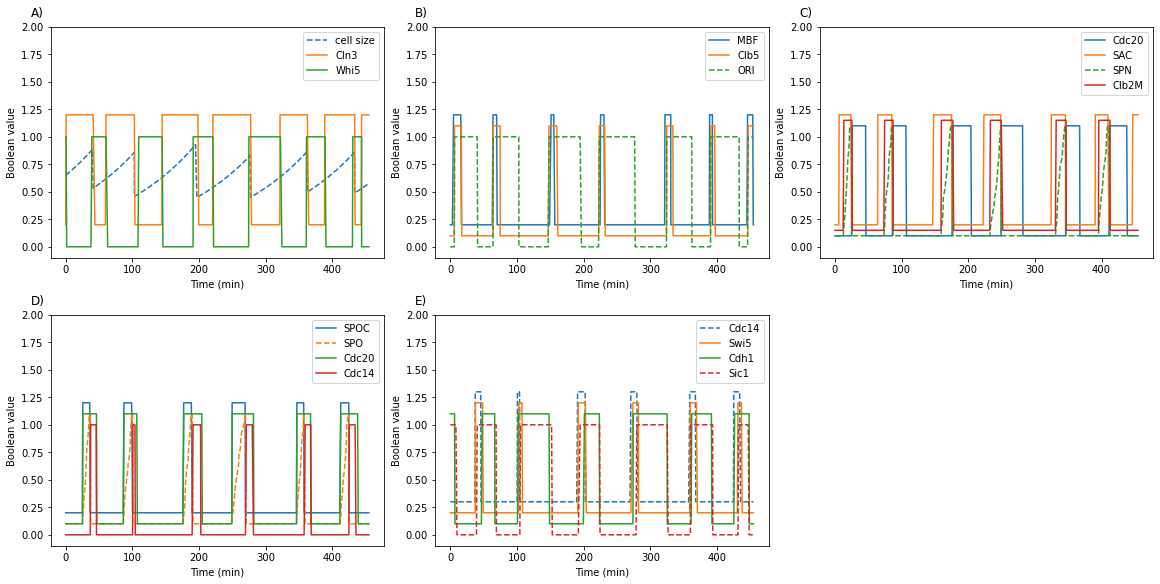

In [3]:
df_sim = pd.read_csv("../data/Fig2.csv")
cdc14_ = np.array(df_sim["cdc14"])
cdh1_ = np.array(df_sim["cdh1"])
cln3_ = np.array(df_sim["cln3"])
clb2M_ = np.array(df_sim["clb2M"])
clb2G_ = np.array(df_sim["clb2G"])
whi5_ = np.array(df_sim["whi5"])
sic1_ = np.array(df_sim["sic1"])
cdc20_ = np.array(df_sim["cdc20"])
swi5_ = np.array(df_sim["swi5"])
cdc5_ = np.array(df_sim["cdc5"])
sbf_ = np.array(df_sim["sbf"])
mbf_ = np.array(df_sim["mbf"])
clb5_ = np.array(df_sim["clb5"])
mcm1_ = np.array(df_sim["mcm1"])
SPN_ = np.array(df_sim["SPN_p"])
sac_ = np.array(df_sim["sac"])
SPOC_ = np.array(df_sim["SPO_p"])
cln2_ = np.array(df_sim["cln2"])
spoc_ = np.array(df_sim["spoc"])
ori_ = np.array(df_sim["ori"])
nrm1_ = np.array(df_sim["nrm1"])
ts = np.array(df_sim["time"])
cs = np.array(df_sim["cell_size"])


#Fig2 plot


fig = plt.figure(layout= 'constrained', figsize=(16,8))
axs = fig.subplot_mosaic([['A)', 'B)','C)'],['D)','E)','.']])

#Fig2A
axs['A)'].plot(ts,cs, label ='cell size',linestyle='--')
axs['A)'].plot(ts,cln3_+0.2, label ='Cln3')
axs['A)'].plot(ts,whi5_, label ='Whi5')
axs['A)'].legend(loc="upper right")
axs['A)'].set_ylim([-0.1, 2])
axs['A)'].set_xlabel("Time (min)")
axs['A)'].set_ylabel("Boolean value")



#Fig2B
axs['B)'].plot(ts,mbf_+0.2, label ='MBF')
axs['B)'].plot(ts,clb5_+0.1, label ='Clb5')
axs['B)'].plot(ts,ori_, label ='ORI',linestyle='--')
axs['B)'].legend(loc="upper right")
axs['B)'].set_ylim([-0.1, 2])
axs['B)'].set_xlabel("Time (min)")
axs['B)'].set_ylabel("Boolean value")


#Fig2C
axs['C)'].plot(ts,cdc20_+0.1, label ='Cdc20')
axs['C)'].plot(ts,sac_+0.2, label ='SAC')
axs['C)'].plot(ts,SPN_+0.1, label ='SPN',linestyle='--')
axs['C)'].plot(ts,clb2M_+0.15, label ='Clb2M')
axs['C)'].legend(loc="upper right")
axs['C)'].set_ylim([-0.1, 2])
axs['C)'].set_xlabel("Time (min)")
axs['C)'].set_ylabel("Boolean value")


#Fig2D
axs['D)'].plot(ts,spoc_+0.2, label ='SPOC')
axs['D)'].plot(ts,SPOC_+0.1, label ='SPO',linestyle='--')
axs['D)'].plot(ts,cdc20_+0.1, label ='Cdc20')
axs['D)'].plot(ts,cdc14_, label ='Cdc14')
axs['D)'].legend(loc="upper right")
axs['D)'].set_ylim([-0.1, 2])
axs['D)'].set_xlabel("Time (min)")
axs['D)'].set_ylabel("Boolean value")


#Fig2E
axs['E)'].plot(ts,cdc14_+0.3, label ='Cdc14',linestyle='--')
axs['E)'].plot(ts,swi5_+0.2, label ='Swi5')
axs['E)'].plot(ts,cdh1_+0.1, label ='Cdh1')
axs['E)'].plot(ts,sic1_, label ='Sic1',linestyle='--')
axs['E)'].legend(loc="upper right")
axs['E)'].set_ylim([-0.1,2])
axs['E)'].set_xlabel("Time (min)")
axs['E)'].set_ylabel("Boolean value")

for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', va='bottom')
plt.savefig('../figures/Fig2.pdf',format="pdf", bbox_inches="tight")
plt.show()